In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import file as dataframe and preview
# .csv file needs to be in same directory as this file
df = pd.read_csv('atx_mean_zhvi_2009-2017.csv')
df.head()

,year,Zip Code,ZHVI_AllHomes
0,2009,78610,180533.33
1,2009,78613,190950.00
2,2009,78617,116075.00
3,2009,78641,153816.67
4,2009,78664,138175.00


In [3]:
len(df)

342

In [4]:
df.dtypes

year               int64
Zip Code           int64
ZHVI_AllHomes    float64
dtype: object

In [5]:
comask_2011 = [x == 2011 for x in df.year]
df_2011 = df[comask_2011]

In [6]:
comask_2016 = [x == 2016 for x in df.year]
df_2016 = df[comask_2016]

In [7]:
df_2011

,year,Zip Code,ZHVI_AllHomes
76,2011,78610,167591.67
77,2011,78613,182450.00
78,2011,78617,104841.67
79,2011,78641,143600.00
80,2011,78664,130350.00
81,2011,78681,191216.67
82,2011,78701,303008.33
83,2011,78702,198791.67
84,2011,78703,509408.33
85,2011,78704,301783.33


In [8]:
list(df_2011['Zip Code'])

[78610,
 78613,
 78617,
 78641,
 78664,
 78681,
 78701,
 78702,
 78703,
 78704,
 78717,
 78721,
 78722,
 78723,
 78725,
 78726,
 78727,
 78728,
 78729,
 78731,
 78733,
 78735,
 78736,
 78738,
 78739,
 78741,
 78744,
 78745,
 78746,
 78748,
 78749,
 78751,
 78752,
 78753,
 78756,
 78757,
 78758,
 78759]

In [9]:
len(df_2016)

38

In [10]:
merge_years = pd.merge(df_2011, df_2016, on="Zip Code")
merge_years

,year_x,Zip Code,ZHVI_AllHomes_x,year_y,ZHVI_AllHomes_y
0,2011,78610,167591.67,2016,223716.67
1,2011,78613,182450.00,2016,253908.33
2,2011,78617,104841.67,2016,160600.00
3,2011,78641,143600.00,2016,206875.00
4,2011,78664,130350.00,2016,182991.67
5,2011,78681,191216.67,2016,260508.33
6,2011,78701,303008.33,2016,436575.00
7,2011,78702,198791.67,2016,333750.00
8,2011,78703,509408.33,2016,749500.00
9,2011,78704,301783.33,2016,487333.33


In [11]:
diff = merge_years.diff(axis=1)

In [12]:
diff_list = list(diff['ZHVI_AllHomes_y'])

In [13]:
merge_years['difference_ZHVI_AllHomes'] = diff_list

In [14]:
merge_years['percent_increase'] = merge_years['difference_ZHVI_AllHomes'] / merge_years['ZHVI_AllHomes_x'] * 100

In [15]:
min_increase = merge_years.min()
min_increase = min_increase.percent_increase.round(2)
min_increase

20.48

In [16]:
max_increase = merge_years.max()
max_increase = max_increase.percent_increase.round(2)
max_increase

93.09

In [17]:
merge_years['percent_increase'] = merge_years['percent_increase'].round(2)

In [18]:
merge_years

,year_x,Zip Code,ZHVI_AllHomes_x,year_y,ZHVI_AllHomes_y,difference_ZHVI_AllHomes,percent_increase
0,2011,78610,167591.67,2016,223716.67,56125.00,33.49
1,2011,78613,182450.00,2016,253908.33,71458.33,39.17
2,2011,78617,104841.67,2016,160600.00,55758.33,53.18
3,2011,78641,143600.00,2016,206875.00,63275.00,44.06
4,2011,78664,130350.00,2016,182991.67,52641.67,40.38
5,2011,78681,191216.67,2016,260508.33,69291.66,36.24
6,2011,78701,303008.33,2016,436575.00,133566.67,44.08
7,2011,78702,198791.67,2016,333750.00,134958.33,67.89
8,2011,78703,509408.33,2016,749500.00,240091.67,47.13
9,2011,78704,301783.33,2016,487333.33,185550.00,61.48


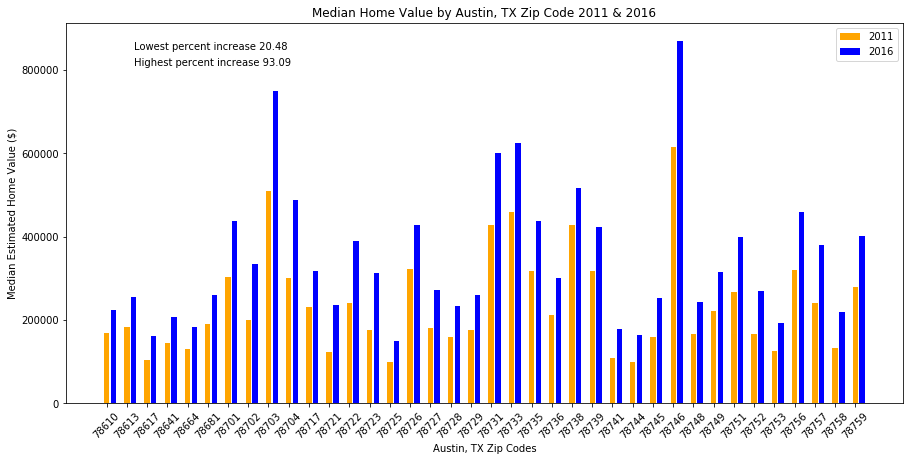

In [19]:
prop_cost2011 = df_2011["ZHVI_AllHomes"]
prop_cost2016 = df_2016["ZHVI_AllHomes"]
zip_code_2011 = df_2011["Zip Code"]
zip_code_2016 = df_2016["Zip Code"]
 
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
y_pos_2011 = [0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,
         63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111]
y_pos_2016 = [1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,
         64,67,70,73,76,79,82,85,88,91,94,97,100,103,106,109,112]
 
# Create bars
plt.bar(y_pos_2011, prop_cost2011, color='orange', alpha=1, label="2011")
plt.bar(y_pos_2016, prop_cost2016, color='blue', alpha=1, label="2016")
 
# Create names on the x-axis
plt.xticks(y_pos_2011, zip_code_2011, rotation=45)
plt.xlabel("Austin, TX Zip Codes")
plt.ylabel("Median Estimated Home Value ($)")
plt.title("Median Home Value by Austin, TX Zip Code 2011 & 2016")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(15,7)

plt.text(4,850000, f"Lowest percent increase {min_increase}", fontsize=10)
plt.text(4,810000, f"Highest percent increase {max_increase}", fontsize=10)

plt.savefig('homevaluechange2011-2016.png')
# Show graphic
plt.show()